# 농식품 구매정보 데이터

## 1. EDA

In [57]:
import pandas as pd
data=pd.read_excel('C:/Users/kuy20/Desktop/실습/sql/fruits.xlsx')
data.info()

C:\Users\kuy20\AppData\Local\Temp\ipykernel_1780\3762413277.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data=pd.read_excel('C:/Users/kuy20/Desktop/실습/sql/fruits.xlsx')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538382 entries, 0 to 538381
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   year              538382 non-null  int64         
 1   month             538382 non-null  int64         
 2   panel_code        538382 non-null  object        
 3   panel_code_new    491529 non-null  object        
 4   type_method       47699 non-null   object        
 5   type_method_etc   18 non-null      object        
 6   type_channel_new  538382 non-null  object        
 7   type_channel      530370 non-null  object        
 8   type_channel_etc  33 non-null      object        
 9   shop_day          538382 non-null  datetime64[ns]
 10  shop_week         538382 non-null  object        
 11  store             538353 non-null  object        
 12  store_code        35906 non-null   object        
 13  store_region      534267 non-null  object        
 14  prod

##  (1) 필요 없는 열 제거 & 중복 행 제거

In [58]:
# 총 22개 제거 axis=1 열 제거
df=data.drop(['panel_code_new','store','type_method','type_method_etc','type_channel','type_channel_etc','store_code','product_code','country','discount','special_diary','bill','bundle','payment','retail','retail_8','retail_new','shop_time','take_out','transport_pre','transport_post','panel_type','edit'],axis=1)
df.head(5)
df=pd.DataFrame(df)

In [59]:
# 중복 행 제거
df2=df.drop_duplicates()

## (2) 결측값 처리

### @ store_region, product의 결측값 처리

In [60]:
df2.isna().sum()

year                     0
month                    0
panel_code               0
type_channel_new         0
shop_day                 0
shop_week                0
store_region          4109
product                  1
wide                     0
middle                   0
detail                   0
purchase                 0
quantity                 0
q_unit              108071
weight_quantity      14647
w_q_unit            372668
multi_quantity       35949
m_unit              419888
w_multi_quantity    450990
w_multi_unit        498531
w_q_kg              100179
w_q_kg_unit         436997
unit_cost           426827
family_num_level         0
age1_group               0
income_v2                0
dtype: int64

### @ type_channel_new가 '온라인몰' 인 것을 store_region가 '온라인'이 되도록 처리 (1064개의 행 처리)

In [61]:
df2.loc[df2['type_channel_new']=='온라인몰','store_region']='온라인' # 특정

In [62]:
df2.isna().sum()

year                     0
month                    0
panel_code               0
type_channel_new         0
shop_day                 0
shop_week                0
store_region          3045
product                  1
wide                     0
middle                   0
detail                   0
purchase                 0
quantity                 0
q_unit              108071
weight_quantity      14647
w_q_unit            372668
multi_quantity       35949
m_unit              419888
w_multi_quantity    450990
w_multi_unit        498531
w_q_kg              100179
w_q_kg_unit         436997
unit_cost           426827
family_num_level         0
age1_group               0
income_v2                0
dtype: int64

### @ 나머지 3046개의 결측값은 전체의 약 0.5%을 차지하므로 그냥 제거

In [63]:
df=df2.dropna(subset=['store_region'])
df=df.dropna(subset=['product'])

In [64]:
df.isna().sum()

year                     0
month                    0
panel_code               0
type_channel_new         0
shop_day                 0
shop_week                0
store_region             0
product                  0
wide                     0
middle                   0
detail                   0
purchase                 0
quantity                 0
q_unit              106541
weight_quantity      14646
w_q_unit            371587
multi_quantity       35943
m_unit              417672
w_multi_quantity    450983
w_multi_unit        496004
w_q_kg               97133
w_q_kg_unit         433951
unit_cost           426822
family_num_level         0
age1_group               0
income_v2                0
dtype: int64

### @ 여기까지 엑셀로 저장하기

In [65]:
df.to_excel('C:/Users/kuy20/Desktop/실습/sql/fruits_after.xlsx')

In [2]:
import pandas as pd
df=pd.read_excel('C:/Users/kuy20/Desktop/실습/sql/fruits_after.xlsx')

## (3) 변수 분석

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import platform

if platform.system()=='Windows':
    path='c:/Windows/Fonts/malgun.ttf'
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
elif platform.system()=='Darwin':
    rc('font',family='AppleGothic')
else:
    print('Check your OS system')

### @ Year(연도) 

#### 결측값&이상값 없음

In [67]:
# 항목별 개수
df['year'].value_counts()

2022    47602
2023    46727
2015    43023
2016    42110
2010    41974
2017    40275
2011    38508
2012    36797
2014    36107
2018    35216
2013    34095
2019    31080
2020    29166
2021    25942
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

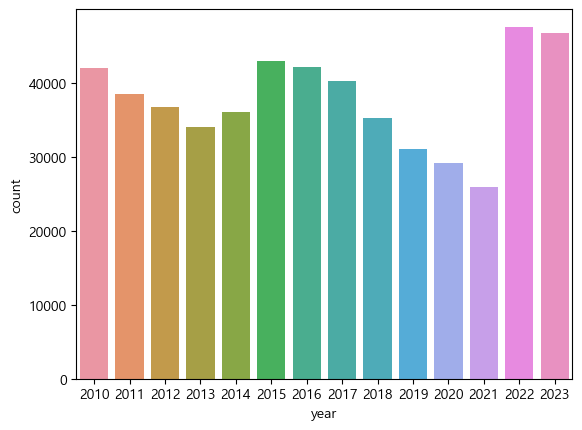

In [68]:
sns.countplot(x="year",data=df)

### @ Month (월)

#### 결측값&이상값 없음

In [69]:
# 항목별 개수
df['month'].value_counts()

8     55224
10    52841
9     50164
11    47052
1     46080
7     45240
12    43631
3     42330
4     41176
2     36361
5     35781
6     32742
Name: month, dtype: int64

<Axes: xlabel='month', ylabel='count'>

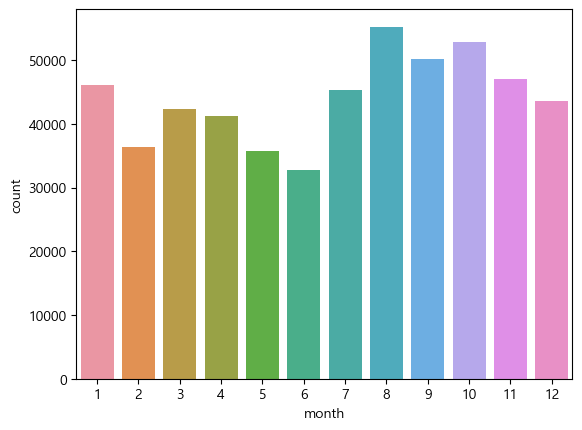

In [70]:
sns.countplot(x="month",data=df)

### @ Pannel_code(고객코드)

#### 결측값&이상값 없음

In [72]:
df['panel_code'].value_counts()

PN00000701    2557
PN00000147    2445
PN00000965    2022
PN00000813    1894
PN00000485    1739
              ... 
PN20210615       1
PN20210978       1
PN20210997       1
PN00001344       1
PN20210178       1
Name: panel_code, Length: 1961, dtype: int64

In [73]:
df.groupby('panel_code')['purchase'].sum()

panel_code
PN00000001     2982176.0
PN00000002     5275940.0
PN00000003    10550140.0
PN00000004      397570.0
PN00000005     7565558.0
                 ...    
PN20211054      818100.0
PN20211056      766338.0
PN20211057      211270.0
PN20211058       16160.0
PN20211059      745108.0
Name: purchase, Length: 1961, dtype: float64

### @ Type_channel_new (구매장소)

#### 결측값&이상값 없음

In [74]:
data['type_channel_new'].value_counts()

슈퍼마켓     243877
대형마트      96693
전통시장      83058
전문점       37061
무점포       28589
온라인몰      25961
백화점        7640
농가직거래      7459
편의점        3672
기타         3469
홈쇼핑         407
정육점         299
외식업체        197
Name: type_channel_new, dtype: int64

In [80]:
df.groupby('type_channel_new')['purchase'].sum()

type_channel_new
기타       4.564204e+07
농가직거래    2.476371e+08
대형마트     7.026903e+08
무점포      2.576752e+08
백화점      6.870348e+07
슈퍼마켓     1.641292e+09
온라인몰     3.503641e+08
외식업체     1.168900e+06
전문점      3.312234e+08
전통시장     6.559004e+08
정육점      3.327530e+06
편의점      1.339915e+07
홈쇼핑      1.370674e+07
Name: purchase, dtype: float64

### @ shop_day (구매날짜)

#### 결측값&이상값 없음

In [81]:
data['shop_day'].nunique()

5113

In [82]:
data['shop_day'].value_counts()

2022-09-09    328
2022-08-27    283
2018-09-22    272
2015-09-26    270
2022-09-08    260
             ... 
2020-01-26     26
2021-09-22     25
2021-02-12     25
2018-02-16     22
2018-05-01      2
Name: shop_day, Length: 5113, dtype: int64

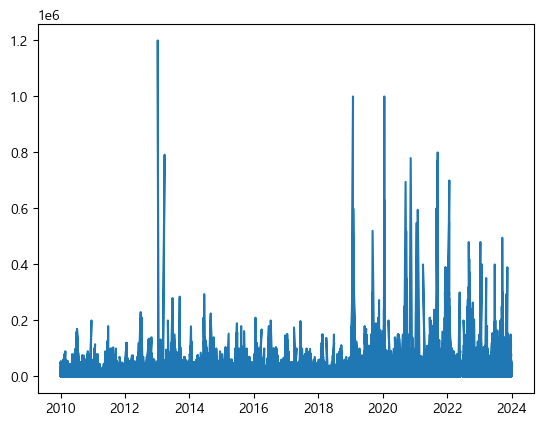

In [83]:
plt.plot(df['shop_day'],df['purchase'])

In [91]:
df.groupby('shop_day')['purchase'].sum()

shop_day
2010-01-01     651170.0
2010-01-02     663224.0
2010-01-03     579075.0
2010-01-04     439883.0
2010-01-05     561987.0
                ...    
2023-12-27    1123380.0
2023-12-28    1437050.0
2023-12-29    1043269.0
2023-12-30    1406658.0
2023-12-31    1212846.0
Name: purchase, Length: 5113, dtype: float64

### @ Shop_week (구매요일)

####  ',' 1개 존재 (토요일로 바꿈) / 나머지 숫자형으로 되어있는 부분 요일 명으로 바꿈

In [4]:
# 문자형으로 바꾸기
# 2019-11-23은 토요일 이므로 바꾸기
df[df['shop_week']== '.']
df.loc[df['shop_week']== '.','shop_week']='7'
df['shop_week'] = df['shop_week'].astype(int)

In [112]:
df['shop_week'].value_counts()

7    89687
6    77790
2    73296
5    73015
4    72511
3    71493
1    70830
Name: shop_week, dtype: int64

In [5]:
df.loc[df['shop_week']== 1,'shop_week']='일'
df.loc[df['shop_week']== 2,'shop_week']='월'
df.loc[df['shop_week']== 3,'shop_week']='화'
df.loc[df['shop_week']== 4,'shop_week']='수'
df.loc[df['shop_week']== 5,'shop_week']='목'
df.loc[df['shop_week']== 6,'shop_week']='금'
df.loc[df['shop_week']== 7,'shop_week']='토'

In [116]:
df['shop_week'].value_counts()

토    89687
금    77790
월    73296
목    73015
수    72511
화    71493
일    70830
Name: shop_week, dtype: int64

<Axes: xlabel='shop_week', ylabel='count'>

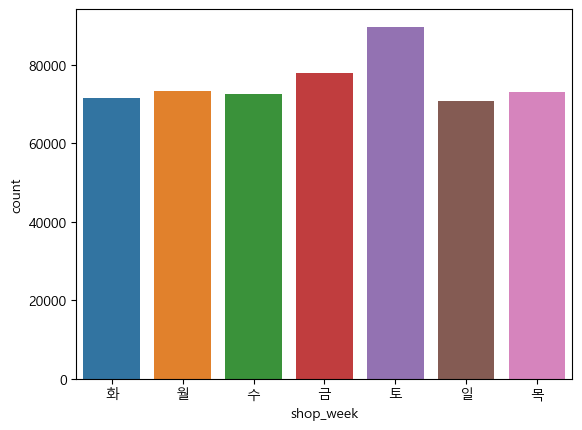

In [117]:
sns.countplot(x="shop_week",data=df)

### @ store_region(구매지역)

#### '기타' 2개 '없음' 44265개 존재

#### '기타'는 모두 경기로 교체/ '없음'은 고려 대상

In [118]:
df['store_region'].value_counts()

경기     231212
서울     174470
인천      47653
없음      44265
온라인     25878
강원        968
충남        691
부산        666
제주        638
경북        540
충북        349
전남        321
전북        240
경남        199
대전        147
광주        134
울산        132
대구         88
세종         29
기타          2
Name: store_region, dtype: int64

In [6]:
# 기타 전부 대형마트 출신
df[df['store_region']=='기타']

,Unnamed: 0,year,month,panel_code,type_channel_new,shop_day,shop_week,store_region,product,wide,...,multi_quantity,m_unit,w_multi_quantity,w_multi_unit,w_q_kg,w_q_kg_unit,unit_cost,family_num_level,age1_group,income_v2
387363,393363,2020,4,PN00001188,대형마트,2020-04-30,목,기타,호주산_어텀크리스피,과일류,...,.,NaN,NaN,NaN,1,KG,NaN,3,50,300~399만원
387364,393364,2020,4,PN00001188,대형마트,2020-04-30,목,기타,프리미엄바나나,과일류,...,7,개,NaN,NaN,.,NaN,NaN,3,50,300~399만원


In [7]:
# 대형마트의 store_region 분포 살펴보기
# 경기가 현저히 많음 즉, 기타를 경기로 바꾸기
df_mart=df[df['type_channel_new']=='대형마트']
df_mart['store_region'].value_counts()

경기    50403
서울    32804
인천     9281
없음      903
충남      207
강원      170
부산       84
전남       75
제주       72
충북       69
대전       65
전북       57
경북       55
광주       28
경남       27
울산       25
세종       18
대구       18
기타        2
Name: store_region, dtype: int64

In [8]:
# 기타를 모두 경기로 바꾸기
df.loc[df['store_region']== '기타','store_region']='경기'
df['store_region'].value_counts()

경기     231214
서울     174470
인천      47653
없음      44265
온라인     25878
강원        968
충남        691
부산        666
제주        638
경북        540
충북        349
전남        321
전북        240
경남        199
대전        147
광주        134
울산        132
대구         88
세종         29
Name: store_region, dtype: int64

### @ product (제품)

#### 제품 종류가 너무 다양하여 사용할지 의문

In [127]:
df['product'].nunique()

43674

In [128]:
df['product'].value_counts()

바나나          41482
사과           36136
귤            19269
단감           14363
복숭아          11224
             ...  
켐벨얼리             1
배_바나나            1
해찬사과_부사          1
사과벌크_홍로_대        1
스위트마운틴_수입        1
Name: product, Length: 43674, dtype: int64

### @ wide (제품(상단)))

#### 하나의 값만 존재/ 삭제 대상

In [129]:
df['wide'].nunique()

1

In [130]:
df['wide'].value_counts()

과일류    528622
Name: wide, dtype: int64

### @ middle ( 제품 (중단))

#### 19종류로 사용하기 좋아보임

In [131]:
df['middle'].nunique()

19

In [132]:
df['middle'].value_counts()

바나나     112887
사과       91884
감귤       69556
포도       49415
복숭아      36588
오렌지      23970
배        22438
단감       22361
참다래      17161
떫은감      14710
자두       13550
열대과일     12718
기타과일     12362
파인애플      8940
체리        8024
베리        6448
레몬        3795
매실        1618
묶음과일       197
Name: middle, dtype: int64

<Axes: xlabel='middle', ylabel='count'>

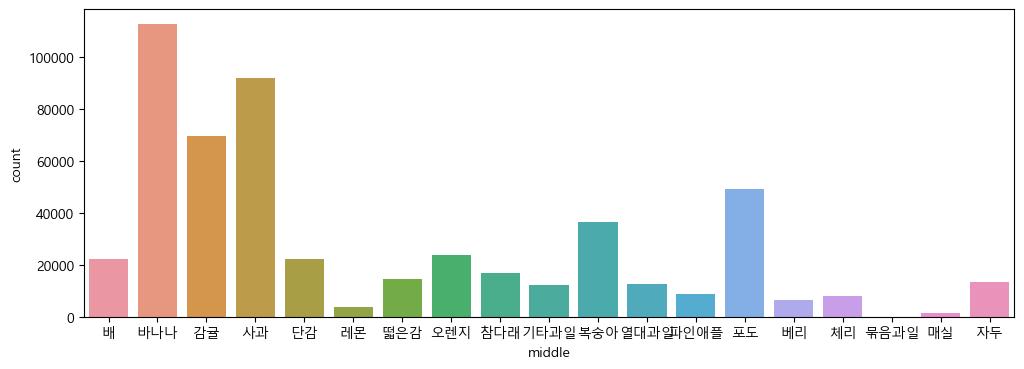

In [135]:
plt.figure(figsize=(12,4))
sns.countplot(x="middle",data=df)

### @ detail(제품(하단))

#### 총 59개로 고려해볼만함

In [137]:
df['detail'].nunique()

19

In [139]:
df['detail'].value_counts()

일반바나나        112117
기타사과          71732
밀감            59518
오렌지           23970
단감            22361
일반복숭아         20912
기타배           17024
기타포도          14135
청포도           13824
자두            13550
후지            11430
천도            11151
파인애플           8940
기타과일           8809
체리             8024
골드키위           8001
홍시             7533
거봉             6747
캠벨얼리           6508
블루베리           5640
신고배            5414
적포도            5309
아오리            5020
그린키위           4769
기타감귤           4699
한라봉            4462
기타키위           4391
기타열대과일         4223
레몬             3795
망고             3547
홍로             3288
황도             2974
대봉             2945
무화과            2497
자몽             2485
석류             2433
머루포도_MBA_      2377
일반떫은감          2020
매실             1618
백도             1486
대봉시            1302
반시              894
기타바나나           770
금귤              643
기타베리            586
델라웨어            414
홍옥              414
혼합과일            348
오디              271
유자              245


<Axes: xlabel='detail', ylabel='count'>

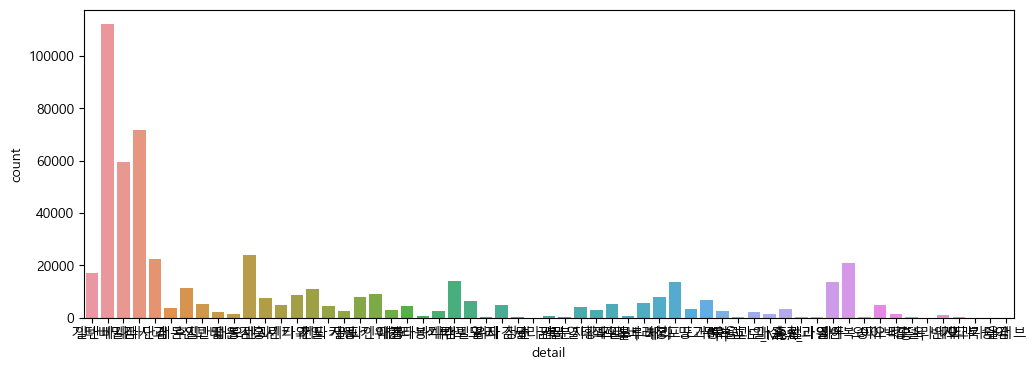

In [143]:
plt.figure(figsize=(12,4))
sns.countplot(x="detail",data=df)

### @ purchase (구매액)

#### 종속변수로 사용

In [9]:
round(df['purchase'].describe(),1)

count     528622.0
mean        8196.3
std        10325.4
min            2.0
25%         3500.0
50%         5000.0
75%        10000.0
max      1200000.0
Name: purchase, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x221fd8bdc50>,
 'caps': [<matplotlib.lines.Line2D at 0x221fd8bc250>,
 'boxes': [<matplotlib.lines.Line2D at 0x221fd8bc190>],
 'medians': [<matplotlib.lines.Line2D at 0x221fd971f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x221fd7e16d0>],
 'means': []}

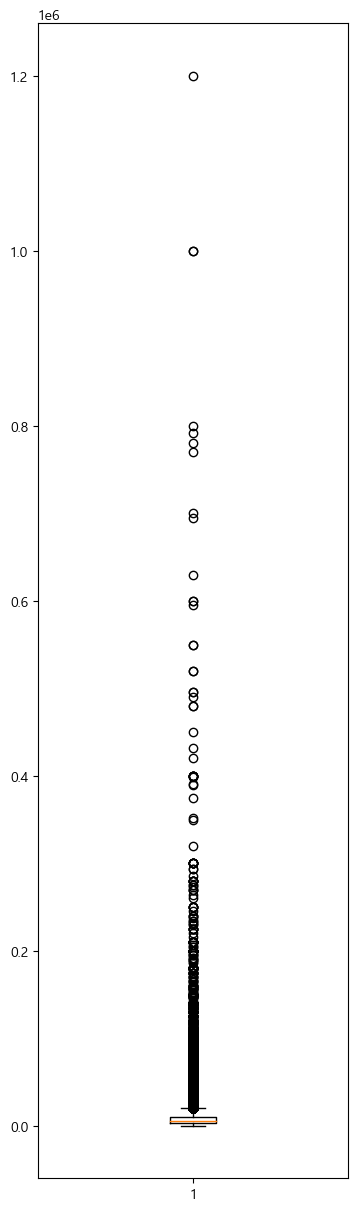

In [10]:
plt.figure(figsize=(4,15))
plt.boxplot(df['purchase'])

In [37]:
# 구매액이 큰 순서
df_purc=df[['panel_code','type_channel_new','store_region','middle','shop_day','family_num_level','income_v2','purchase']]
df_purc.sort_values('purchase',ascending=False).head(20)

,panel_code,type_channel_new,store_region,middle,shop_day,family_num_level,income_v2,purchase
119016,PN00000779,기타,없음,베리,2013-01-07,6,700만원 이상,1200000.0
349014,PN00000574,농가직거래,없음,감귤,2019-01-30,2,600~699만원,1000000.0
379915,PN00000574,농가직거래,없음,감귤,2020-01-20,2,700만원 이상,1000000.0
425475,PN00000379,농가직거래,없음,복숭아,2021-09-16,2,600~699만원,800000.0
124025,PN00000559,농가직거래,없음,베리,2013-03-26,3,500~599만원,792000.0
405319,PN20150399,슈퍼마켓,경기,떫은감,2020-11-14,3,700만원 이상,780000.0
425890,PN00000672,농가직거래,경북,사과,2021-09-15,3,700만원 이상,770000.0
435032,PN00000672,농가직거래,경북,사과,2022-01-26,3,700만원 이상,700000.0
399479,PN00001125,온라인몰,온라인,기타과일,2020-09-17,2,700만원 이상,695000.0
379987,PN00000672,농가직거래,경북,사과,2020-01-21,3,200~299만원,630000.0


In [38]:
# 구매액이 작은 순서
df_purc.sort_values('purchase',ascending=True).head(10)

,panel_code,type_channel_new,store_region,middle,shop_day,family_num_level,income_v2,purchase
190634,PN20150422,슈퍼마켓,경기,단감,2015-01-12,1,200만원 미만,2.0
308026,PN00000952,슈퍼마켓,서울,열대과일,2017-11-02,5,400~499만원,10.0
207190,PN00000172,전문점,경기,포도,2015-07-18,4,400~499만원,12.0
390647,PN00000370,슈퍼마켓,경기,복숭아,2020-06-12,7,600~699만원,20.0
459512,PN00001180,농가직거래,인천,복숭아,2022-08-07,3,700만원 이상,50.0
441573,PN20210904,온라인몰,온라인,체리,2022-02-09,1,300~399만원,100.0
448398,PN20210703,슈퍼마켓,서울,바나나,2022-04-20,1,300~399만원,100.0
346344,PN00000694,온라인몰,온라인,감귤,2018-12-18,4,400~499만원,100.0
519008,PN00001418,편의점,서울,바나나,2023-11-24,1,400~499만원,100.0
370908,PN20150776,슈퍼마켓,서울,사과,2019-09-06,2,300~399만원,100.0


In [39]:
# 10000원 이상의 행수
df_purc[df_purc['purchase']>=10000].count()

panel_code          132416
type_channel_new    132416
store_region        132416
middle              132416
shop_day            132416
family_num_level    132416
income_v2           132416
purchase            132416
dtype: int64

In [35]:
# 1500원 이하의 행수
df_purc[df_purc['purchase']<=1500].count()

panel_code          15175
type_channel_new    15175
store_region        15175
middle              15175
shop_day            15175
family_num_level    15175
purchase            15175
dtype: int64

### @ family_num_level (가족구성원 수)

In [155]:
df['family_num_level'].nunique()

7

In [156]:
df['family_num_level'].value_counts()

4    207784
3    142925
2     88481
5     40338
1     35737
6     13318
7        39
Name: family_num_level, dtype: int64

<Axes: xlabel='family_num_level', ylabel='count'>

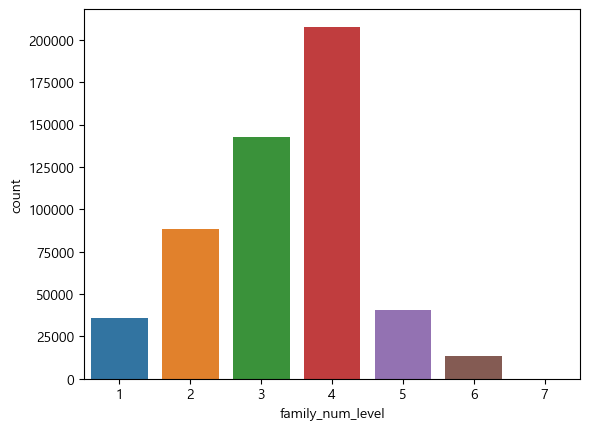

In [157]:
sns.countplot(x="family_num_level",data=df)

### @ age_group (나이 그룹)

In [159]:
df['age1_group'].nunique()

7

In [161]:
df['age1_group'].value_counts()

50    175346
40    171727
60    107183
30     66825
70      6125
20      1310
80       106
Name: age1_group, dtype: int64

<Axes: xlabel='age1_group', ylabel='count'>

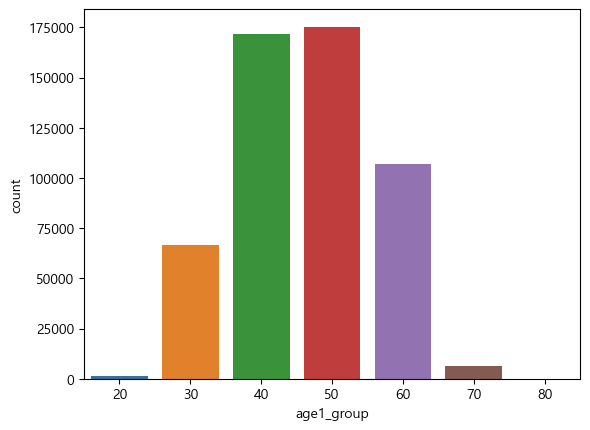

In [162]:
sns.countplot(x="age1_group",data=df)

### @ income (가계 수입)

In [165]:
df['income_v2'].nunique()

7

In [166]:
df['income_v2'].value_counts()

300~399만원    100486
700만원 이상      93659
400~499만원     90407
200~299만원     74547
500~599만원     66492
200만원 미만      58839
600~699만원     44192
Name: income_v2, dtype: int64

<Axes: xlabel='income_v2', ylabel='count'>

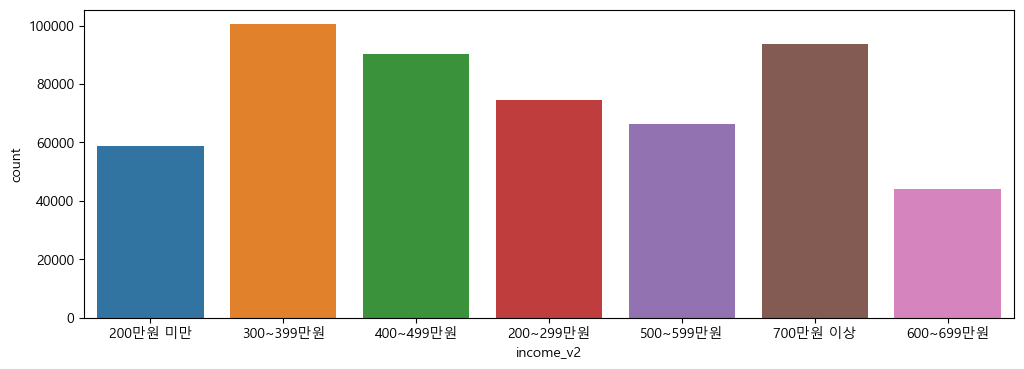

In [168]:
plt.figure(figsize=(12,4))
sns.countplot(x="income_v2",data=df)